In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy import linalg
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import accuracy_score as acc_score
from sklearn.metrics import mean_squared_error
from seaborn import heatmap as hmap
from sklearn.datasets import make_regression
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import svm
from seaborn import heatmap as h_map
import pandas as pd
import os
# Group_No_5
os.chdir(r'E:\Sem6\PRML\PA_2\PA2_Datasets\PA2_Datasets\Dataset_2')

Text(0.5, 1.0, 'Scatter plot of Dataset 2 Team 5')

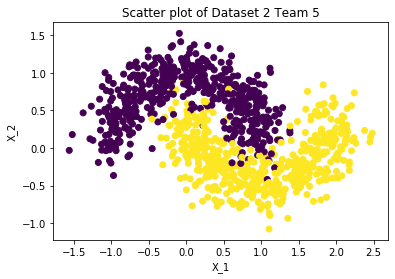

In [7]:
# Load the data
my_data = np.genfromtxt('Dataset_2_Team_5.csv', delimiter=',')

X = my_data[:,:-1]
y = my_data[:,-1]
X_train,X_temp,y_train,y_temp = train_test_split(X,y,train_size = 0.8)
X_test,X_val,y_test,y_val = train_test_split(X_temp,y_temp,train_size = 0.5)

# For decision boundaries
h=0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

# Scatter plot
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.title('Scatter plot of Dataset 2 Team 5')

Text(0.5, 1.0, 'Learning curve for polynomial kernel svm classifier')

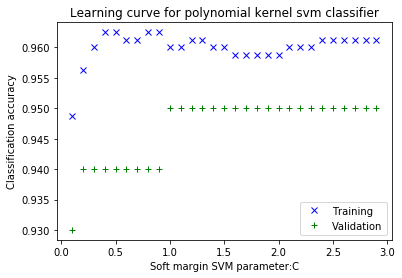

In [46]:
## Try out learning curve for choosing different parameters for polynomial kernel: soft margin svm
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(0.1,3,0.1)
for c in c_values:
    clf = svm.SVC(C = c,coef0 = 1.0,gamma = 1.0,kernel='poly',degree = 3)
    clf.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Soft margin SVM parameter:C')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for polynomial kernel svm classifier')

Train Accuracy for polynomial kernel: 0.96
Validation Accuracy for polynomial kernel: 0.95
Test Accuracy for polynomial kernel: 0.96
       No of support vectors
0                          3
1                          9
-1                         0
Total                     12


Actual,0.0,1.0
Predicted,,
0.0,45,3
1.0,1,51


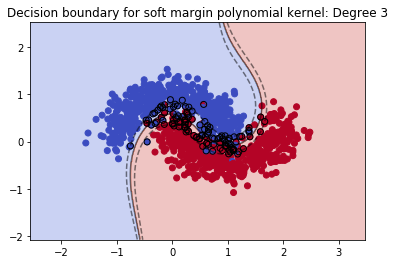

In [22]:
#### Get Train,Test and Validation error for polynomial kernel: soft margin svm
## Choosen parameters: degree = 3, C = 1.0, gamma = 1.0 and coeff = 1.0
d = 3
clf = svm.SVC(gamma=1.0,C =1.0,coef0 = 1.0,kernel = 'poly',degree = d)
clf.fit(X_train,y_train)
sv_linear = clf.support_vectors_
train_acc = acc_score(y_train,clf.predict(X_train))
val_acc = acc_score(y_val,clf.predict(X_val))
test_acc = acc_score(y_test,clf.predict(X_test))
print('Train Accuracy for polynomial kernel:',train_acc)
print('Validation Accuracy for polynomial kernel:',val_acc)
print('Test Accuracy for polynomial kernel:',test_acc)
## To get no of support vectors on margin
decision_function=clf.decision_function(X_train)
a=1e-2 # If we set it to 0, or very small then support vectors on margins will be 0,because decision boundary is plotted  
        # with least count, 1e-2. Plotting decision boundary for smaller values will be computationally intensive
l=(2*y_train-1)*decision_function
margins = [0,1,-1]
support_vector_indices =[]
support_vectors = []
no_of_support_vectors =[]
for m in margins:
    (low_lim,up_lim)=(m-a,m+a)
    support_vector_indices.append(np.where(np.logical_and(l>=low_lim, l<=up_lim)))
    support_vectors.append(X_train[support_vector_indices[-1]])
    no_of_support_vectors.append(support_vectors[-1].shape[0])
no_of_support_vectors.append(sum(no_of_support_vectors))
print(pd.DataFrame(no_of_support_vectors,index = [0,1,-1,'Total'],columns = ['No of support vectors']))
######
#Scatter plot with decision function for polynomial kernel : soft margin svm
z_poly = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for soft margin polynomial kernel: Degree %s'%str(d))
pd.crosstab(pd.Series(clf.predict(X_test),name = 'Predicted'),pd.Series(y_test,name = 'Actual'))

Train Accuracy for rbf kernel: 0.91
Validation Accuracy for rbf kernel: 0.9
Test Accuracy for rbf kernel: 0.89
       No of support vectors
0                          1
1                         10
-1                         0
Total                     11


Actual,0.0,1.0
Predicted,,
0.0,45,10
1.0,1,44


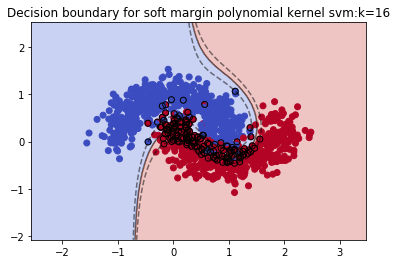

In [42]:
#### Get Train,Test and Validation error for polynomial kernel: soft margin svm
## Choosen parameters: coeff = 0 and gamma = 1.5, C = 10.
## k = [2,4,8,16]
k = 16
clf = svm.SVC(gamma=1.0,C =1.0,coef0=1.0,kernel = 'poly',class_weight={0.0:k,1.0:1})#,degree = 3)
clf.fit(X_train,y_train)
sv_linear = clf.support_vectors_
train_acc = acc_score(y_train,clf.predict(X_train))
val_acc = acc_score(y_val,clf.predict(X_val))
test_acc = acc_score(y_test,clf.predict(X_test))
print('Train Accuracy for rbf kernel:',train_acc)
print('Validation Accuracy for rbf kernel:',val_acc)
print('Test Accuracy for rbf kernel:',test_acc)
## To get no of support vectors on margin
decision_function=clf.decision_function(X_train)
a=1e-2 # If we set it to 0, or very small then support vectors on margins will be 0,because decision boundary is plotted  
        # with least count, 1e-2. Plotting decision boundary for smaller values will be computationally intensive
l=(2*y_train-1)*decision_function
margins = [0,1,-1]
support_vector_indices =[]
support_vectors = []
no_of_support_vectors =[]
for m in margins:
    (low_lim,up_lim)=(m-a,m+a)
    support_vector_indices.append(np.where(np.logical_and(l>=low_lim, l<=up_lim)))
    support_vectors.append(X_train[support_vector_indices[-1]])
    no_of_support_vectors.append(support_vectors[-1].shape[0])
no_of_support_vectors.append(sum(no_of_support_vectors))
print(pd.DataFrame(no_of_support_vectors,index = [0,1,-1,'Total'],columns = ['No of support vectors']))
######
#Scatter plot with decision function for polynomial kernel: soft margin svm for different k
z_poly = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for soft margin polynomial kernel svm:k=%s'%str(k))
#Confusion matrix
pd.crosstab(pd.Series(clf.predict(X_test),name = 'Predicted'),pd.Series(y_test,name = 'Actual'))

Text(0.5, 1.0, 'Learning curve for rbf kernel svm classifier')

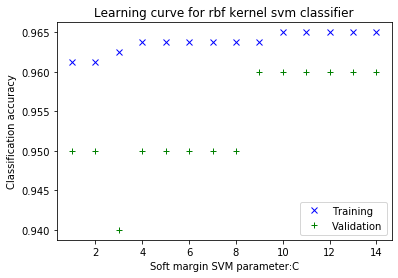

In [35]:
## Try out learning curve for choosing different parameters for rbf kernel: soft margin svm
val_accuracy =[]
train_accuracy =[]
c_values = np.arange(1,15,1)#np.array([0.5,1.0,10])#np.arange(0.1,2,0.1)
for c in c_values:
    clf = svm.SVC(C = c,gamma = 1.0,coef0 = 0.0,kernel='rbf')
    clf.fit(X_train,y_train)
    val_accuracy.append(acc_score(y_val,clf.predict(X_val)))
    train_accuracy.append(acc_score(y_train,clf.predict(X_train)))
plt.plot(c_values,train_accuracy,'bx',c_values,val_accuracy,'g+')
plt.xlabel('Soft margin SVM parameter:C')
plt.ylabel('Classification accuracy')
plt.legend(['Training','Validation'])
plt.title('Learning curve for rbf kernel svm classifier')

Train Accuracy for rbf kernel: 0.96375
Validation Accuracy for rbf kernel: 0.96
Test Accuracy for rbf kernel: 0.95
       No of support vectors
0                          1
1                         15
-1                         1
Total                     17


Actual,0.0,1.0
Predicted,,
0.0,44,3
1.0,2,51


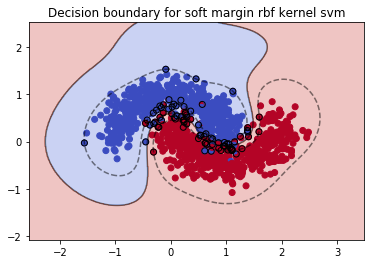

In [36]:
#### Get Train,Test and Validation error for rbf kernel: soft margin svm
## Choosen parameters: coeff = 0 and gamma = 1.0, C = 10.
clf = svm.SVC(gamma=1.5,C =10,kernel = 'rbf')
clf.fit(X_train,y_train)
sv_linear = clf.support_vectors_
train_acc = acc_score(y_train,clf.predict(X_train))
val_acc = acc_score(y_val,clf.predict(X_val))
test_acc = acc_score(y_test,clf.predict(X_test))
print('Train Accuracy for rbf kernel:',train_acc)
print('Validation Accuracy for rbf kernel:',val_acc)
print('Test Accuracy for rbf kernel:',test_acc)

## To get no of support vectors on margin
decision_function=clf.decision_function(X_train)
a= 1e-2# If we set it to 0, or very small then support vectors on margins will be 0,because decision boundary is plotted  
        # with least count, 1e-2. Plotting decision boundary for smaller values will be computationally intensive
l=(2*y_train-1)*decision_function
margins = [0,1,-1]
support_vector_indices =[]
support_vectors = []
no_of_support_vectors =[]
for m in margins:
    (low_lim,up_lim)=(m-a,m+a)
    support_vector_indices.append(np.where(np.logical_and(l>=low_lim, l<=up_lim)))
    support_vectors.append(X_train[support_vector_indices[-1]])
    no_of_support_vectors.append(support_vectors[-1].shape[0])
no_of_support_vectors.append(sum(no_of_support_vectors))
print(pd.DataFrame(no_of_support_vectors,index = [0,1,-1,'Total'],columns = ['No of support vectors']))

#Scatter plot with decision function for rbf kernel: soft margin svm
z_poly = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for soft margin rbf kernel svm')
pd.crosstab(pd.Series(clf.predict(X_test),name = 'Predicted'),pd.Series(y_test,name = 'Actual'))

Train Accuracy for rbf kernel: 0.92375
Validation Accuracy for rbf kernel: 0.9
Test Accuracy for rbf kernel: 0.89
       No of support vectors
0                          1
1                         18
-1                         0
Total                     19


Actual,0.0,1.0
Predicted,,
0.0,45,10
1.0,1,44


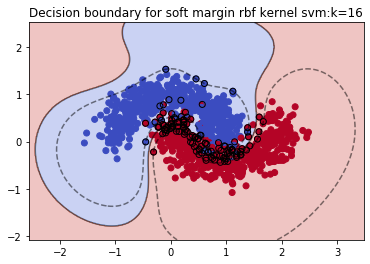

In [38]:
#### Get Train,Test and Validation error for rbf kernel: soft margin svm
## Choosen parameters: coeff = 0 and gamma = 1.5, C = 10.
## k = [2,4,8,16]
k = 16
clf = svm.SVC(gamma=1.0,C =10,kernel = 'rbf',class_weight={0.0:k,1.0:1})#,degree = 3)
clf.fit(X_train,y_train)
sv_linear = clf.support_vectors_
train_acc = acc_score(y_train,clf.predict(X_train))
val_acc = acc_score(y_val,clf.predict(X_val))
test_acc = acc_score(y_test,clf.predict(X_test))
print('Train Accuracy for rbf kernel:',train_acc)
print('Validation Accuracy for rbf kernel:',val_acc)
print('Test Accuracy for rbf kernel:',test_acc)
## To get no of support vectors on margin
decision_function=clf.decision_function(X_train)
a=1e-2 # If we set it to 0, or very small then support vectors on margins will be 0,because decision boundary is plotted  
        # with least count, 1e-2. Plotting decision boundary for smaller values will be computationally intensive
l=(2*y_train-1)*decision_function
margins = [0,1,-1]
support_vector_indices =[]
support_vectors = []
no_of_support_vectors =[]
for m in margins:
    (low_lim,up_lim)=(m-a,m+a)
    support_vector_indices.append(np.where(np.logical_and(l>=low_lim, l<=up_lim)))
    support_vectors.append(X_train[support_vector_indices[-1]])
    no_of_support_vectors.append(support_vectors[-1].shape[0])
no_of_support_vectors.append(sum(no_of_support_vectors))
print(pd.DataFrame(no_of_support_vectors,index = [0,1,-1,'Total'],columns = ['No of support vectors']))
######
#Scatter plot with decision function for rbf kernel: soft margin svm for different k
z_poly = clf.predict(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
Z_poly = clf.decision_function(np.c_[xx.ravel(),yy.ravel()]).reshape(xx.shape)
plt.contourf(xx,yy,z_poly,cmap=plt.cm.coolwarm,alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.contour(xx, yy, Z_poly, colors='k', levels=[-1, 0, 1], alpha=0.5,linestyles=['--', '-', '--'])
plt.scatter(sv_linear[:, 0], sv_linear[:, 1],linewidth=1, facecolors='None', edgecolors='k')
plt.title('Decision boundary for soft margin rbf kernel svm:k=%s'%str(k))
pd.crosstab(pd.Series(clf.predict(X_test),name = 'Predicted'),pd.Series(y_test,name = 'Actual'))